In [14]:
import numpy as np 
import pandas as pd 


import os
path=r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset'
for dirname, _, filenames in os.walk('path'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
import sys
sys.executable

'C:\\Users\\ADMIN\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [17]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [23]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
paths = []
label  = []

for i in labels:
    #d=r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Training'
    folderPath = os.path.join(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Training',i)
    paths.append(folderPath)
    label.append(i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    #a=r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Testing'
    folderPath = os.path.join(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

data ={
    'Path':paths,
    'label':label
}
df = pd.DataFrame(data)

df.to_csv('dataset.csv',index=False)
display(df)

,Path,label
0,C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Tra...,glioma
1,C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Tra...,meningioma
2,C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Tra...,notumor
3,C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Tra...,pituitary


In [24]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(7023, 150, 150, 3)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [26]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [27]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
178/178 [==============================] - 1050s 6s/step - loss: 1.5441 - accuracy: 0.4650 - val_loss: 1.0238 - val_accuracy: 0.5332
Epoch 2/20
178/178 [==============================] - 701s 4s/step - loss: 0.6931 - accuracy: 0.7173 - val_loss: 0.8823 - val_accuracy: 0.6646
Epoch 3/20
178/178 [==============================] - 678s 4s/step - loss: 0.5312 - accuracy: 0.7813 - val_loss: 0.7664 - val_accuracy: 0.6867
Epoch 4/20
178/178 [==============================] - 694s 4s/step - loss: 0.4448 - accuracy: 0.8182 - val_loss: 1.0641 - val_accuracy: 0.6266
Epoch 5/20
178/178 [==============================] - 714s 4s/step - loss: 0.3977 - accuracy: 0.8414 - val_loss: 0.8146 - val_accuracy: 0.7073
Epoch 6/20
178/178 [==============================] - 741s 4s/step - loss: 0.3389 - accuracy: 0.8643 - val_loss: 0.9875 - val_accuracy: 0.6392
Epoch 7/20
178/178 [==============================] - 1764s 10s/step - loss: 0.2793 - accuracy: 0.8915 - val_loss: 0.3760 - val_accuracy: 0.8

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
model.save('braintumor.h5')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


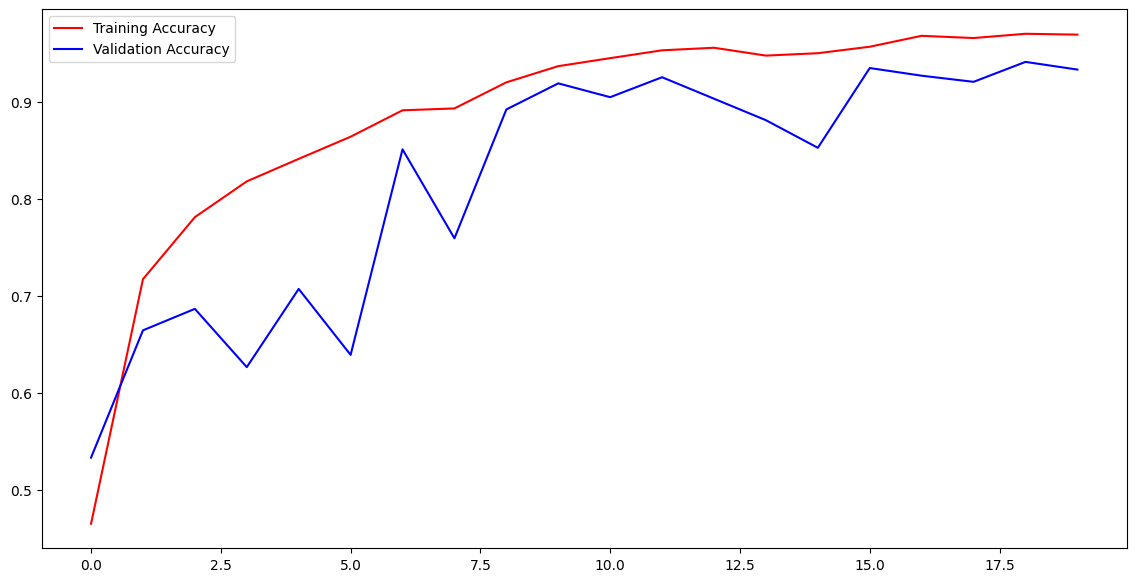

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

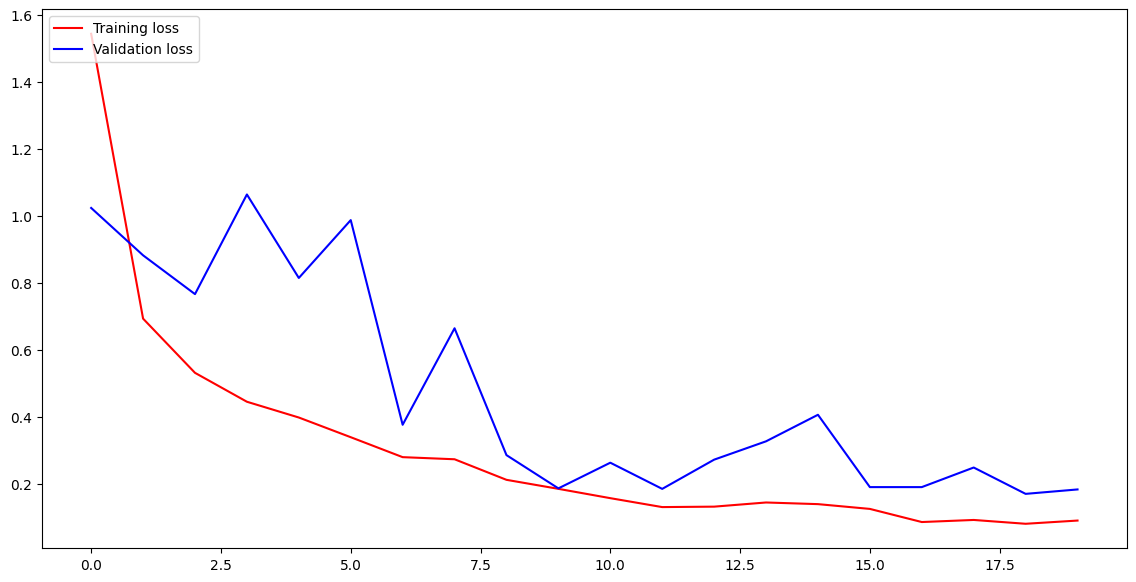

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [67]:
import cv2
img = cv2.imread(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Testing\notumor\Te-noTr_0001.jpg')
if img is not None:
    img = cv2.resize(img,(150,150))
img_array = np.array(img)
    #if img_array.shape == (150, 150, 3):  # Check if the shape is (150, 150, 3)
       # img_array = img_array.reshape(1, 150, 150, 3)
        #print(img_array.shape)
img_array.shape

(150, 150, 3)

In [68]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

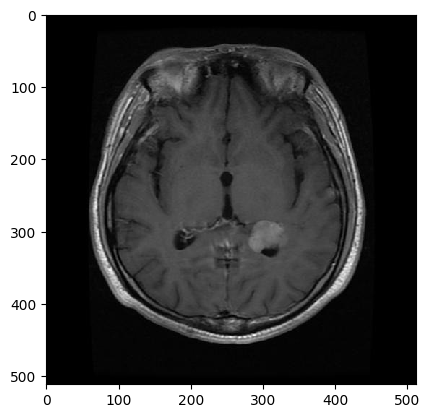

In [70]:
import tensorflow.keras.utils as image
img=image.load_img(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Training\meningioma\Tr-meTr_0002.jpg')
#img = image.load_img(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Training\meningioma_tumor/m (2).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [71]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 1s/step


2

In [72]:
labels[indices]

'notumor'

## For Loaded Model

In [73]:
model1=tf.keras.models.load_model("braintumor.h5")

In [75]:
img = cv2.imread(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Testing\notumor\Te-noTr_0001.jpg')
if img is not None:
    img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [77]:
import numpy as np 
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

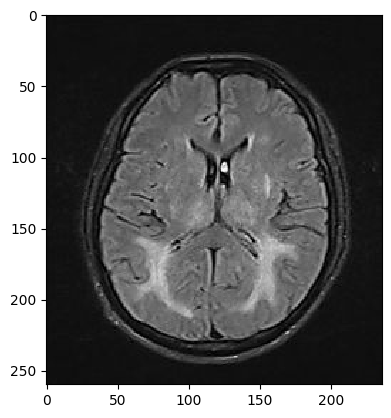

In [78]:
import tensorflow.keras.utils as image
img = image.load_img(r'C:\Users\ADMIN\Desktop\Brain Tumor\dataset\Testing\notumor\Te-noTr_0001.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [79]:
a=model1.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 208ms/step


2

In [80]:
a

array([[9.8726821e-05, 1.5326770e-03, 9.9836785e-01, 7.5377994e-07]],
      dtype=float32)

In [81]:
labels[indices]

'notumor'